<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-librarys-and-data" data-toc-modified-id="Importing-librarys-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing librarys and data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-preparation-before-machine-learning-modeling" data-toc-modified-id="Data-preparation-before-machine-learning-modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation before machine learning modeling</a></span></li><li><span><a href="#feature-selection" data-toc-modified-id="feature-selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>feature selection</a></span></li><li><span><a href="#Baseline-Metrics" data-toc-modified-id="Baseline-Metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Baseline Metrics</a></span></li><li><span><a href="#best-model" data-toc-modified-id="best-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>best model</a></span></li><li><span><a href="#Predict-on-test-data" data-toc-modified-id="Predict-on-test-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predict on test data</a></span></li></ul></div>

# Importing librarys and data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('Datasets/titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('Datasets/titanic_test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_all = pd.concat([train_df, test_df],axis=0)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# EDA

In [8]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [9]:
data_all.select_dtypes(object).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [15]:
import cufflinks as cf
cf.set_config_file(offline=True)
data_all['Survived'].value_counts(normalize=True).iplot(kind='bar', theme='white', title='target variable distribution')

In [13]:
sex_pivot_table = pd.pivot_table(data_all, index='Sex', columns='Survived', values='PassengerId', aggfunc='count')
sex_pivot_table.divide(sex_pivot_table.sum(axis=1), axis='index')

Survived,0.0,1.0
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [16]:
sex_pivot_table.divide(sex_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white',
                    title='Sex - Survived Clustered Bar Chart', colorscale='set1')

In [17]:
data_all.iloc[:891].query('Sex == "male"').groupby('Survived').mean().T

Survived,0.0,1.0
PassengerId,449.121795,475.724771
Pclass,2.476496,2.018349
Age,31.618056,27.276022
SibSp,0.440171,0.385321
Parch,0.207265,0.357798
Fare,21.960993,40.821484


In [18]:
pclass_pivot_table = pd.pivot_table(data_all, index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')
pclass_pivot_table.divide(pclass_pivot_table.sum(axis=1), axis='index')

Survived,0.0,1.0
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [19]:
pclass_pivot_table.divide(pclass_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                            title='Pclass - Survived Clustered Bar Chart',colorscale='set1')

In [20]:
data_all['Cabin_type'] = data_all['Cabin'].map(lambda x: x[0].upper() if pd.notna(x) else '?') # Extract initials of Cabin
data_all['Cabin_type'].value_counts()

?    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_type, dtype: int64

In [21]:
cabin_pivot_table = pd.pivot_table(data_all, index='Cabin_type', columns='Survived', values='PassengerId', aggfunc='count')
cabin_pivot_table

Survived,0.0,1.0
Cabin_type,,
?,481.0,206.0
A,8.0,7.0
B,12.0,35.0
C,24.0,35.0
D,8.0,25.0
E,8.0,24.0
F,5.0,8.0
G,2.0,2.0
T,1.0,NaN


In [22]:
cabin_pivot_table.divide(cabin_pivot_table.sum(axis=1), axis='index')

Survived,0.0,1.0
Cabin_type,,
?,0.700146,0.299854
A,0.533333,0.466667
B,0.255319,0.744681
C,0.406780,0.593220
D,0.242424,0.757576
E,0.250000,0.750000
F,0.384615,0.615385
G,0.500000,0.500000
T,1.000000,NaN


In [23]:
cabin_pivot_table.divide(cabin_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                            title='Cabin_name - Survived Clustered Bar Chart',colorscale='set1')

In [24]:
carbin_pclass_pivot_table = data_all.groupby(['Cabin_type', 'Pclass']).size().unstack(0)
carbin_pclass_pivot_table

Cabin_type,?,A,B,C,D,E,F,G,T
Pclass,,,,,,,,,
1,67.0,22.0,65.0,94.0,40.0,34.0,NaN,NaN,1.0
2,254.0,NaN,NaN,NaN,6.0,4.0,13.0,NaN,NaN
3,693.0,NaN,NaN,NaN,NaN,3.0,8.0,5.0,NaN


In [25]:
carbin_pclass_pivot_table2 = carbin_pclass_pivot_table.divide(carbin_pclass_pivot_table.sum(axis=0), axis='columns')
carbin_pclass_pivot_table2

Cabin_type,?,A,B,C,D,E,F,G,T
Pclass,,,,,,,,,
1,0.066075,1.0,1.0,1.0,0.869565,0.829268,NaN,NaN,1.0
2,0.250493,NaN,NaN,NaN,0.130435,0.097561,0.619048,NaN,NaN
3,0.683432,NaN,NaN,NaN,NaN,0.073171,0.380952,1.0,NaN


In [26]:
carbin_pclass_pivot_table2.T.iplot(kind='bar', title='Cabin_type - Pclass Clustered Bar Chart', theme='white')

In [27]:
def get_carbin(x):
    if x in ['A', 'B', 'C']:
        return 1
    elif x in ['D', 'E']:
        return 2
    elif x in ['F', 'G']:
        return 3
    elif x in ['T']:
        return 1
    else:
        return 4
data_all['Cabin_type'] = data_all['Cabin_type'].map(get_carbin)
data_all['Cabin_type'].value_counts()

4    1014
1     182
2      87
3      26
Name: Cabin_type, dtype: int64

In [28]:
cabin_pivot_table = pd.pivot_table(data_all, index='Cabin_type', columns='Survived', values='PassengerId', aggfunc='count')
cabin_pivot_table.divide(cabin_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                            title='Cabin_type - Survived Clustered Bar Chart',colorscale='set1')

In [29]:
data_all['if_hit_carbin'] = data_all['Cabin'].map(lambda x: x[0].upper() if pd.notna(x) else '?').map(lambda x: 1 if x=="A" else 0)
hit_cabin_pivot_table = pd.pivot_table(data_all, index='if_hit_carbin', columns='Survived', values='PassengerId', aggfunc='count')
hit_cabin_pivot_table.divide(hit_cabin_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white',
                    title='if_hit_carbin - Survived Clustered Bar Chart',colorscale='set1')

In [30]:
age_median = data_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.median())
data_all['Age'] = data_all.apply(lambda x: age_median.loc[(x['Sex'], x['Pclass'])] if pd.isna(x['Age']) else x['Age'], axis=1)
data_all['age_band'] = pd.cut(data_all['Age'], bins=10)
data_all['age_band'] = data_all['age_band'].map(str)
age_band__pivot_table = pd.pivot_table(data_all, index='age_band', columns='Survived', values='PassengerId', aggfunc='count')
age_band__pivot_table.divide(age_band__pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                            title='age_band - Survived Clustered Bar Chart',colorscale='set1')

In [31]:
data_all['num_of_rela'] = data_all['SibSp'] + data_all['Parch'] + 1
data_all['if_alone'] = data_all['num_of_rela'].map(lambda x: 1 if x==1 else 0)
def get_num_of_rela(x):
    if x == 1:
        return 1
    elif x <= 3:
        return 2
    elif x > 3:
        return 3
data_all['num_of_rela'] = data_all['num_of_rela'].map(get_num_of_rela)
num_of_rela__pivot_table = pd.pivot_table(data_all, index='num_of_rela', columns='Survived', values='PassengerId', aggfunc='count')
num_of_rela__pivot_table

Survived,0.0,1.0
num_of_rela,,
1,374,163
2,115,148
3,60,31


In [32]:
num_of_rela__pivot_table.divide(num_of_rela__pivot_table.sum(axis=1), axis='index')

Survived,0.0,1.0
num_of_rela,,
1,0.696462,0.303538
2,0.437262,0.562738
3,0.659341,0.340659


In [33]:
num_of_rela__pivot_table.divide(num_of_rela__pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                                title='num_of_rela - Survived Clustered Bar Chart',colorscale='set1')

In [34]:
if_alone__pivot_table2 = pd.pivot_table(data_all, index='if_alone', columns='Survived', values='PassengerId', aggfunc='count')
if_alone__pivot_table2

Survived,0.0,1.0
if_alone,,
0,175,179
1,374,163


In [35]:
if_alone__pivot_table2.divide(if_alone__pivot_table2.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                    title='if_alone - Survived Clustered Bar Chart',colorscale='set1')

In [36]:
embarked_pivot_table = pd.pivot_table(data_all, index='Embarked', columns='Survived', values='PassengerId', aggfunc='count')
embarked_pivot_table

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,217


In [37]:
embarked_pivot_table.divide(embarked_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                                    title='Embarked - Survived Clustered Bar Chart',colorscale='set1')

In [38]:
data_all['Embarked'].fillna('S', inplace=True)
data_all['Embarked'] = data_all['Embarked'].map(lambda x: 1 if x=='C' else 2 if x=='Q' else 3 if x=='S' else np.nan)

In [39]:
fare_median = data_all.groupby(['Pclass'])['Fare'].median()
fare_median

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [40]:
data_all['Fare'] = data_all.apply(lambda x: fare_median[x['Pclass']] if pd.isna(x['Fare']) else x['Fare'], axis=1)
data_all['fare_band'] = pd.cut(data_all['Fare'], 20)
data_all['fare_band'] = data_all['fare_band'].map(str)
fare_band_pivot_table = pd.pivot_table(data_all, index='fare_band', columns='Survived', values='PassengerId', aggfunc='count')
fare_band_pivot_table

Survived,0.0,1.0
fare_band,,
"(-0.512, 25.616]",402,160
"(25.616, 51.233]",97,73
"(51.233, 76.849]",27,40
"(76.849, 102.466]",9,30
"(102.466, 128.082]",4,11
"(128.082, 153.699]",4,12
"(153.699, 179.315]",0,2
"(179.315, 204.932]",0,0
"(204.932, 230.548]",3,6


In [41]:
fare_band_pivot_table.divide(fare_band_pivot_table.sum(axis=1), axis='index')

Survived,0.0,1.0
fare_band,,
"(-0.512, 25.616]",0.715302,0.284698
"(25.616, 51.233]",0.570588,0.429412
"(51.233, 76.849]",0.402985,0.597015
"(76.849, 102.466]",0.230769,0.769231
"(102.466, 128.082]",0.266667,0.733333
"(128.082, 153.699]",0.250000,0.750000
"(153.699, 179.315]",0.000000,1.000000
"(179.315, 204.932]",NaN,NaN
"(204.932, 230.548]",0.333333,0.666667


In [42]:
fare_band_pivot_table.divide(fare_band_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                                    title='fare_band - Survived Clustered Bar Chart',colorscale='set1')

In [43]:
data_all[['fare_band', 'Embarked']].head()

,fare_band,Embarked
0,"(-0.512, 25.616]",3
1,"(51.233, 76.849]",1
2,"(-0.512, 25.616]",3
3,"(51.233, 76.849]",3
4,"(-0.512, 25.616]",3


In [44]:
data_all['fare_band'].map(str).astype(object).unique()

array(['(-0.512, 25.616]', '(51.233, 76.849]', '(25.616, 51.233]',
       '(256.165, 281.781]', '(128.082, 153.699]', '(76.849, 102.466]',
       '(230.548, 256.165]', '(102.466, 128.082]', '(486.713, 512.329]',
       '(153.699, 179.315]', '(204.932, 230.548]'], dtype=object)

In [45]:
data_all[['Sex', 'fare_band']].head()

,Sex,fare_band
0,male,"(-0.512, 25.616]"
1,female,"(51.233, 76.849]"
2,female,"(-0.512, 25.616]"
3,female,"(51.233, 76.849]"
4,male,"(-0.512, 25.616]"


In [46]:
data_all['Sex_fare_band'] = data_all['Sex'] + '_' + data_all['fare_band'].map(str).astype(object)\
                            .map(lambda x: x if x in ['(-0.512, 25.616]'] else '?')
data_all['Sex_fare_band'] = data_all['Sex_fare_band'].map(lambda x: 1 if x == 'male_(-0.512, 25.616]' else 0)

In [47]:
data_all['Sex_fare_band'].value_counts()

0    730
1    579
Name: Sex_fare_band, dtype: int64

In [48]:
embarked_fare_band_pivot_table = pd.pivot_table(data_all, index=['Embarked', 'Pclass'], columns='Survived', values='PassengerId', aggfunc='count')
embarked_fare_band_pivot_table

Survived         0.0  1.0
Embarked Pclass          
1        1        26   59
         2         8    9
         3        41   25
2        1         1    1
         2         1    2
         3        45   27
3        1        53   76
         2        88   76
         3       286   67

In [49]:
embarked_fare_band_pivot_table.iplot(kind='bar', title='Different comb of Port of Embark and Pclass Survived Clustered Bar Chart', theme='white')

In [50]:
embarked_fare_band_pivot_table.divide(embarked_fare_band_pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white',\
                                title='Different combinations of Port of Embarkation and Pclass Survived Clustered Bar Chart')

In [51]:
data_all['Embarked + Pclass'] = data_all.apply(lambda x: str(x['Embarked']) + '_' + str(x['Pclass']), axis=1)   

In [53]:
import re
data_all['name_title'] = data_all['Name'].map(lambda x: re.search(r', (.*)\.', x).group(1))
data_all['name_title'].value_counts()

Mr                          757
Miss                        260
Mrs                         196
Master                       61
Rev                           8
Dr                            8
Col                           4
Mlle                          2
Major                         2
Ms                            2
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Dona                          1
Name: name_title, dtype: int64

In [54]:
def get_title(x):
    if x in ['Mr', 'Sir', 'Don', 'Major']:
        return 'Mr'
    elif x in ['Mrs', 'Lady', 'Mme', 'Mrs. Martin (Elizabeth L', 'Ms', 'the Countess', 'Dona']:
        return 'Mrs'
    elif x in ['Miss', 'Mlle']:
        return 'Miss'
    elif x in ['Master', 'Master', 'Capt']:
        return 'professional'
    else:
        return '?'
data_all['name_title'] = data_all['name_title'].map(get_title)
name_title__pivot_table = pd.pivot_table(data_all, index='name_title', columns='Survived', values='PassengerId', aggfunc='count')
name_title__pivot_table.fillna(0, inplace=True)
name_title__pivot_table.sort_values(by=0, ascending=False, inplace=True)
name_title__pivot_table

Survived,0.0,1.0
name_title,,
Mr,438,83
Miss,55,129
Mrs,26,103
professional,18,23
?,12,4


In [55]:
name_title__pivot_table.divide(name_title__pivot_table.sum(axis=1), axis='index').iplot(kind='bar', theme='white', 
                                title='name_title - Survived Clustered Bar Chart',colorscale='set1')

In [56]:
data_all.query('Cabin == "C23 C25 C27"')[['Name', 'Pclass']]

,Name,Pclass
27,"Fortune, Mr. Charles Alexander",1
88,"Fortune, Miss. Mabel Helen",1
341,"Fortune, Miss. Alice Elizabeth",1
438,"Fortune, Mr. Mark",1
53,"Fortune, Miss. Ethel Flora",1
69,"Fortune, Mrs. Mark (Mary McDougald)",1


In [57]:
data_all['family_name'] = data_all['Name'].map(lambda x: x.split(',')[0].lower().strip())
data_all[['Name', 'family_name']].head()

,Name,family_name
0,"Braund, Mr. Owen Harris",braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",cumings
2,"Heikkinen, Miss. Laina",heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",futrelle
4,"Allen, Mr. William Henry",allen


In [58]:
data_all['family_name'] = data_all.apply(lambda x: x['family_name'] + '_' + str(x['Pclass']), axis=1)

In [59]:
families = np.intersect1d(data_all.iloc[:891]['family_name'], data_all.iloc[891:]['family_name'])
family_survival_rate = data_all.iloc[:891].query('family_name in @families').groupby(['family_name'])[['Survived', 'num_of_rela']].agg(['median'])
family_survival_rate.columns = ['num', 'total']
family_survival_rate = family_survival_rate.query('total > 1').copy()
family_survival_rate['rate'] = family_survival_rate['num'] / family_survival_rate['total']

family_survival_rate_dict = family_survival_rate['rate'].to_dict()
data_all['family_survival_rate'] = data_all['family_name'].map(family_survival_rate_dict)

data_all['family_survival_rate'].fillna(data_all.iloc[:891]['Survived'].mean(), inplace=True)
data_all['family_survival_rate2'] = data_all['family_name'].map(lambda x: 1 if x in family_survival_rate_dict else 0)

In [60]:
data_all['if_married'] = data_all.apply(lambda x: 1 if (x['name_title'] == 'Mrs') else 0, axis=1)
data_all['if_married'].value_counts()

0    1106
1     203
Name: if_married, dtype: int64

In [61]:
data_all.groupby(['if_married', 'Survived']).size().unstack(0)

if_married,0,1
Survived,,
0.0,523,26
1.0,239,103


In [62]:
# Training set, test set ticket number matching
data_all.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,num_of_rela,if_alone,fare_band,Sex_fare_band,Embarked + Pclass,name_title,family_name,family_survival_rate,family_survival_rate2,if_married
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0,"(-0.512, 25.616]",1,3_3,Mr,braund_3,0.383838,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,0,"(51.233, 76.849]",0,1_1,Mrs,cumings_1,0.500000,1,1


In [63]:
data_all['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [64]:
data_all['Ticket_Frequency'] = data_all.groupby('Ticket')['Ticket'].transform('count')

tickets = np.intersect1d(data_all.iloc[:891]['Ticket'], data_all.iloc[891:]['Ticket'])

ticket_survival_rate = data_all.iloc[:891].query('Ticket in @tickets').groupby(['Ticket']).agg({'Survived': 'median', 'Ticket_Frequency': 'mean'})
ticket_survival_rate.columns = ['num', 'total']
ticket_survival_rate = ticket_survival_rate.query('total > 1').copy()
ticket_survival_rate['rate'] = ticket_survival_rate['num'] / ticket_survival_rate['total']

# ticket_survival_rate['ticket_survival_rate'] = ticket_survival_rate['num'] / ticket_survival_rate['total']
# ticket_survival_rate['num'] = ticket_survival_rate['num'].

ticket_survival_rate_dict = ticket_survival_rate['num'].to_dict()
data_all['ticket_survival_rate'] = data_all['Ticket'].map(ticket_survival_rate_dict)

# data_all['ticket_survival_rate'].fillna(0, inplace=True)

data_all['ticket_survival_rate'].fillna(data_all.iloc[:891]['Survived'].mean(), inplace=True)
data_all['ticket_survival_rate2'] = data_all['Ticket'].map(lambda x: 1 if x in ticket_survival_rate_dict else 0)

In [65]:
data_all['mean_survival_rate'] = (data_all['family_survival_rate'] + data_all['ticket_survival_rate'])/2
data_all['survival_rate2'] = (data_all['family_survival_rate2'] + data_all['ticket_survival_rate2'])/2
data_all.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,name_title,family_name,family_survival_rate,family_survival_rate2,if_married,Ticket_Frequency,ticket_survival_rate,ticket_survival_rate2,mean_survival_rate,survival_rate2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,braund_3,0.383838,0,0,1,0.383838,0,0.383838,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,cumings_1,0.500000,1,1,2,1.000000,1,0.750000,1.0


In [66]:
data_all[['PassengerId', 'ticket_survival_rate']].head(10)

,PassengerId,ticket_survival_rate
0,1,0.383838
1,2,1.000000
2,3,0.383838
3,4,0.383838
4,5,0.383838
5,6,0.383838
6,7,0.000000
7,8,0.000000
8,9,0.383838
9,10,0.383838


In [67]:
def get_num(x):
    try:
        return int(x)
    except:
        pass

In [68]:
data_all['Ticket_1'] = data_all['Ticket'].map(lambda x: str(x).strip().lower().replace('.', '')).map(lambda x: x.split('/')[0] if '/' in x else '?')
# data_all['f8'] = LabelEncoder().fit_transform(data_all['f8'])

# data_all['f9'] = data_all['Ticket'].map(lambda x: str(x).strip().lower().replace('.', '')).map(lambda x: x.split('/')[1] if '/' in x else '?')
data_all['Ticket_2'] = data_all['Ticket'].map(lambda x: str(x).strip().lower().replace('.', '')).map(
                lambda x: x.split(' ')[1] if ' ' in x else x).map(get_num)
data_all['Ticket_2'].fillna(data_all['Ticket_2'].median(), inplace=True)

data_all['Ticket_3'] = data_all['Ticket'].map(lambda x: str(x).strip().lower().replace('.', '')).map(
                lambda x: x.split(' ')[-1] if ' ' in x else x if x !='line' else '').str.len()
data_all['name_length'] = data_all['Name'].str.len()

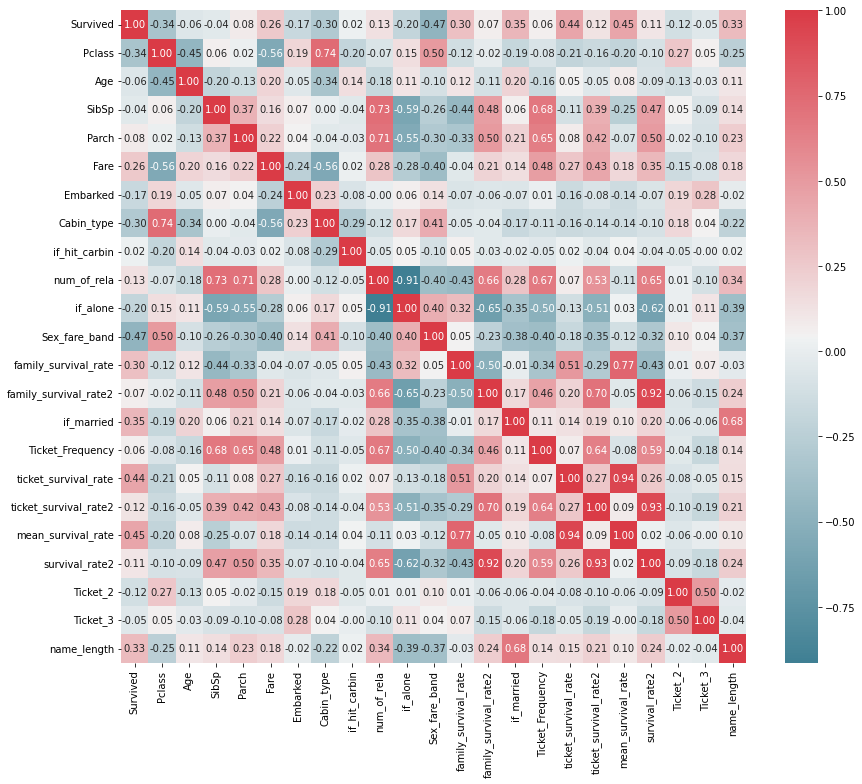

In [69]:
# Correlation coefficient heat map
plt.figure(figsize=[14, 12])
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_all.drop('PassengerId', axis=1).corr(), cmap=cmap, annot=True, fmt='.2f')
plt.show()

# Data preparation before machine learning modeling

In [70]:
label_cols = ['Pclass', 'Sex', 'Embarked', 'survival_rate2']
onehot_cols = ['age_band', 'fare_band', 'Cabin_type', 'name_title', 'num_of_rela']
num_cols = ['Ticket_Frequency', 'mean_survival_rate']
data_all.reset_index(drop=True, inplace=True)
data_prepared = data_all.copy()

In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
onehot_cols2 = []
for c in onehot_cols[:]:
    encoder = OneHotEncoder()
    sub_data = encoder.fit_transform(data_prepared[[c]])    
    cols = encoder.get_feature_names_out()
    sub_data = pd.DataFrame(sub_data.toarray(), columns = cols)
    onehot_cols2.append(cols)
    data_prepared = pd.merge(data_prepared, sub_data, left_index=True, right_index=True)

In [73]:
onehot_cols2 = np.concatenate(onehot_cols2)
onehot_df = data_prepared[onehot_cols2].copy()
num_df = StandardScaler().fit_transform(data_prepared[num_cols])
num_df = pd.DataFrame(num_df, columns=num_cols)
label_df = data_prepared[label_cols].copy()
for c in list(label_df):
    label_df[c] = LabelEncoder().fit_transform(label_df[c])

final_df = pd.merge(onehot_df, label_df, left_index=True, right_index=True)
final_df = pd.merge(final_df, num_df, left_index=True, right_index=True)
X_train_prepared = final_df.iloc[:891].copy()
X_test_prepared = final_df.iloc[891:].copy()

y_train = data_prepared.iloc[:891]['Survived']

In [74]:
X_train_prepared.shape, X_test_prepared.shape, y_train.shape

((891, 39), (418, 39), (891,))

In [75]:
drop_cols= X_train_prepared.columns[X_train_prepared.nunique() == 1]

X_train_prepared.drop(drop_cols, axis=1, inplace=True)
X_test_prepared.drop(drop_cols, axis=1, inplace=True)

In [76]:
X_train_prepared.shape, X_test_prepared.shape, y_train.shape

((891, 39), (418, 39), (891,))

# feature selection

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
fs = SelectKBest(score_func=f_classif, k=30)
fs.fit(X_train_prepared.values, y_train)

SelectKBest(k=30)

In [79]:
fs.transform(X_train_prepared.values).shape

(891, 30)

In [80]:
feature_scores = pd.Series(fs.scores_, index=list(X_train_prepared)).sort_values(ascending=False)
selected_features = feature_scores.loc[lambda x: x>1].index.tolist()
X_train_prepared = X_train_prepared[selected_features].copy()
X_test_prepared = X_test_prepared[selected_features].copy()
X_train_prepared.shape[1], X_test_prepared.shape[1]

(33, 33)

# Baseline Metrics

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

baseline_models = {
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'RandomForest': RandomForestClassifier(max_depth=7, n_estimators=1700),
    'XGBoost': xgb.XGBClassifier(**{'eval_metric': 'error', 'n_jobs': 4, 'objective': 'binary:logistic'}),
    'LGBM': lgb.LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier()}

In [87]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, plot_roc_curve, auc

k = 5
skf = StratifiedKFold(n_splits=k, random_state=24, shuffle=True)
kf = KFold(n_splits=k, shuffle=True)
baseline_metrics = {}
metrics_data = []
for name, model in tqdm(baseline_models.items()):

    acc_list = []
    f1_list = []
    for i in range(5):
        for train_index, test_index in kf.split(X_train_prepared, y_train):

            # check if accuracy will be better after smote or adasyn?
            # smo = ADASYN(sampling_strategy='minority')
            # X_smo, y_smo = smo.fit_resample(X_train_prepared.loc[train_index].values, y_train.loc[train_index])
            # model.fit(X_smo, y_smo)

            model.fit(X_train_prepared.loc[train_index].values, y_train.loc[train_index])
            y_pred = model.predict(X_train_prepared.loc[test_index].values)
            acc_list.append(accuracy_score(y_train[test_index], y_pred))
            f1_list.append(f1_score(y_train[test_index], y_pred))
        
    metrics_data.append([name, np.mean(acc_list), np.std(acc_list), np.mean(f1_list), np.std(f1_list)])

100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:42<00:00,  5.30s/it]


In [88]:
metrics_df = pd.DataFrame(metrics_data, columns=['algorithm', 'accuracy mean', 'accuracy std', 'f1 mean', 'f1 std'])
metrics_df.sort_values(by='accuracy mean', ascending=False, inplace=True)

In [89]:
my_style = 'background-color: darkorange; font-weight: bold'
metrics_df.style.applymap(lambda x: my_style, subset=['accuracy mean', 'f1 mean'])

,algorithm,accuracy mean,accuracy std,f1 mean,f1 std
6,AdaBoost,0.847366,0.025278,0.799333,0.034804
3,RandomForest,0.846710,0.025536,0.794018,0.038118
2,LogisticRegression,0.845330,0.029744,0.794331,0.043350
4,XGBoost,0.842423,0.024545,0.784526,0.025949
5,LGBM,0.841294,0.021159,0.782595,0.029385
7,ExtraTreesClassifier,0.832326,0.020577,0.768939,0.033010
1,KNN,0.831665,0.025904,0.765768,0.036603
0,DecisionTree,0.817738,0.025675,0.747973,0.035739


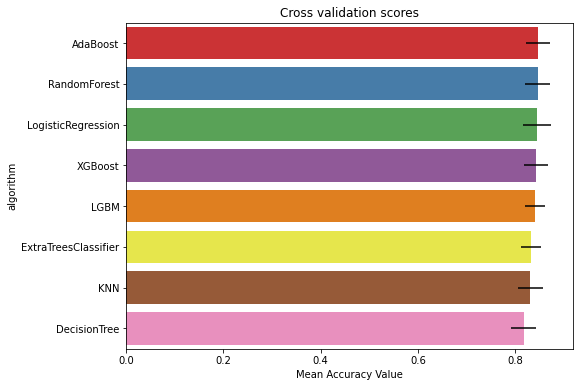

In [90]:
plt.figure(figsize=[8,6])
g = sns.barplot(x="accuracy mean", y="algorithm", data = metrics_df.sort_values(by='accuracy mean', ascending=False), 
                palette="Set1",orient = "h",**{'xerr': metrics_df['accuracy std']})
g.set_xlabel("Mean Accuracy Value")
g = g.set_title("Cross validation scores")

# best model

In [94]:
%%time
from sklearn.model_selection import train_test_split, GridSearchCV
forest_clf = RandomForestClassifier(random_state=42) #class_weight='balanced', 

parameters = {"max_depth": [7],
              "min_samples_split": [6],
              "min_samples_leaf": [6],
              'oob_score': [True],
              "n_estimators" : [1750],
              "criterion": ["gini"]}

gs = GridSearchCV(forest_clf, parameters, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gs.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 1.62 s
Wall time: 4.54 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [6], 'min_samples_split': [6],
                         'n_estimators': [1750], 'oob_score': [True]},
             scoring='accuracy', verbose=1)

In [95]:
forest_best_params = gs.best_params_
forest_clf = gs.best_estimator_
forest_best_params

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 1750,
 'oob_score': True}

In [96]:
forest_clf.oob_score_, gs.best_score_

(0.8496071829405163, 0.8428410018203503)

# Predict on test data

In [97]:
y_new_pred = forest_clf.predict(X_test_prepared)
y_new_pred = y_new_pred.astype(int)
pred_data = pd.DataFrame({'PassengerId': data_all.iloc[891:]['PassengerId'].values,'Survived': y_new_pred})

In [98]:
pred_data['Survived'] = pred_data['Survived'].map(int)
pred_data.to_csv('KaggleSubmissions/titanictestsub.csv', index=False)